# Problem Statement

Based on the given customer reviews on the products and the reviews of the website about an E – commerce company. We have to predict the rating given by a customer based on the text data written in the review.


# Business understanding

E-Business companies have their own review and ratings application in their platform. But often, reviews of a product spread across multiple sources like Facebook posts, Tweets, Blogs etc.  Companies can make use of the data available in their platform to train Machine Learning / Deep Learning models and predict ratings for the reviews available in social media platforms. 

Business can utilize these ratings to understand the products reach and customer sentiments on a product. It will help them to improve their marketing strategies, build better products, provide good services.

# Method 1

# Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import nltk

import re
import string
import os

from nltk.corpus import stopwords

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline


# We will use the following Scikit-Learn classes for the activity
from sklearn.metrics import confusion_matrix
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [4]:
review_data_train = pd.read_csv("./Dataset/train.csv",delimiter=",")

In [5]:
review_data_train.describe()

,ID,overall
count,77075.000000,77075.000000
mean,38538.000000,4.306546
std,22249.780336,1.052075
min,1.000000,1.000000
25%,19269.500000,4.000000
50%,38538.000000,5.000000
75%,57806.500000,5.000000
max,77075.000000,5.000000


In [6]:
review_data_train.dtypes

ID             int64
reviewText    object
overall        int64
dtype: object

In [7]:
review_data_test = pd.read_csv("./Dataset/test.csv",delimiter=",")

In [8]:
#preview data
print (review_data_train.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
review_data_train.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77075 entries, 0 to 77074
Data columns (total 3 columns):
ID            77075 non-null int64
reviewText    77049 non-null object
overall       77075 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ MB
None


,ID,reviewText,overall
61626,61627,Good price but have not used yet.................,4
40069,40070,Good program. Interesting angle here. I was re...,4
76832,76833,I compared this to to peat pellets for rooting...,4
23987,23988,This is a really amazing portable Midi Keyboar...,5
10152,10153,We have had live traps for rabbits and garden ...,5
53634,53635,"And this show has it all, sci-fi, quantum phys...",5
73615,73616,"love it. bring some tissues, makes me wife cry...",5
8105,8106,The perlite arrived well packed. I did not hav...,5
73470,73471,"Great story, great acting and the different sh...",5
44181,44182,Great price and it attracts bugs. It is on the...,5


In [9]:
#preview data
print (review_data_test.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
review_data_test.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 2 columns):
ID            4057 non-null int64
reviewText    4056 non-null object
dtypes: int64(1), object(1)
memory usage: 63.5+ KB
None


,ID,reviewText
2924,80000,Have not used it yet but come this winter I am...
182,77258,The banter between Steve and Danno is up to pa...
60,77136,"Best guitar picks. Great shape, sturdy. No fan..."
3663,80739,this season of veronica mars was thriling it a...
1815,78891,This series is addictive for all the right rea...
3538,80614,We happened upon this show by chance... it was...
2124,79200,Guitar picks. What can I say? I bought these a...
733,77809,Some very strong character development from al...
1853,78929,Very interesting. Even though I have watch ot...
3884,80960,"Alphas is an original, fascinating show. It de..."


In [10]:
review_data_train.iloc[435:,:]

,ID,reviewText,overall
435,436,I am very pleased with this battery maintainer...,5
436,437,NaN,4
437,438,This is a porous synthetic mat to use for drai...,5
438,439,The first episode of any new series has the un...,1
439,440,Well Sandra Oh is leaving the show--Christina ...,5
440,441,This is a great product but could be made a li...,3
441,442,I'll be honest: I don't really like giving pr...,4
442,443,This trellis netting work great for vertical g...,4
443,444,It's sort of german mythical/fable mixed in wi...,4
444,445,"I have to join in the chorus of dismay, even a...",3


In [11]:
review_data_train[review_data_train['reviewText'].isnull()]

,ID,reviewText,overall
436,437,NaN,4
480,481,NaN,4
1334,1335,NaN,5
1936,1937,NaN,5
4425,4426,NaN,3
9959,9960,NaN,2
11108,11109,NaN,1
11801,11802,NaN,5
11959,11960,NaN,5
15311,15312,NaN,5


In [12]:
print('Train columns with null values:\n', review_data_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', review_data_test.isnull().sum())
print("-"*10)

review_data_train.describe(include = 'all')

Train columns with null values:
 ID             0
reviewText    26
overall        0
dtype: int64
----------
Test/Validation columns with null values:
 ID            0
reviewText    1
dtype: int64
----------


,ID,reviewText,overall
count,77075.000000,77049,77075.000000
unique,NaN,77033,NaN
top,NaN,#NAME?,NaN
freq,NaN,3,NaN
mean,38538.000000,NaN,4.306546
std,22249.780336,NaN,1.052075
min,1.000000,NaN,1.000000
25%,19269.500000,NaN,4.000000
50%,38538.000000,NaN,5.000000
75%,57806.500000,NaN,5.000000


In [13]:
review_data_train.head()

,ID,reviewText,overall
0,1,These are so wonderful to have in the car in t...,5
1,2,XL fits perfect on me over armored riding jack...,5
2,3,Since I had just noticed my wiper blades neede...,3
3,4,I am very satisfied with G110v2. It is comfor...,5
4,5,This amp did a good job for its rating. It was...,3


In [14]:
review_data_train.head()

,ID,reviewText,overall
0,1,These are so wonderful to have in the car in t...,5
1,2,XL fits perfect on me over armored riding jack...,5
2,3,Since I had just noticed my wiper blades neede...,3
3,4,I am very satisfied with G110v2. It is comfor...,5
4,5,This amp did a good job for its rating. It was...,3


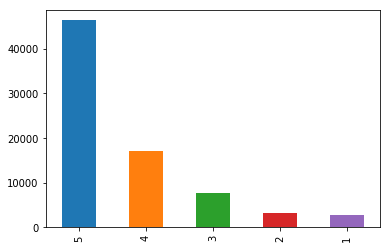

In [15]:
review_data_train["overall"].value_counts().plot.bar()

We see that there are 46317 values that are giving 5 rating

In [16]:
review_data_train["overall"].value_counts()

5    46317
4    16997
3     7676
2     3241
1     2844
Name: overall, dtype: int64

In [17]:
cleanup_re = re.compile('[^a-z]+')

def cleanup(sentence):
    sentence = str(sentence)
    sentence = re.sub(r'\s+',' ',sentence) #\s is for white spaces
    sentence = re.sub('[\d]','',sentence)  #\d is for digits
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence


review_data_train["Summary_Clean_reviewtext"] = review_data_train["reviewText"].apply(cleanup)
review_data_test["Summary_Clean_reviewtext"] = review_data_test["reviewText"].apply(cleanup)

In [18]:
review_data_train.head()

,ID,reviewText,overall,Summary_Clean_reviewtext
0,1,These are so wonderful to have in the car in t...,5,these are so wonderful to have in the car in t...
1,2,XL fits perfect on me over armored riding jack...,5,xl fits perfect on me over armored riding jack...
2,3,Since I had just noticed my wiper blades neede...,3,since i had just noticed my wiper blades neede...
3,4,I am very satisfied with G110v2. It is comfor...,5,i am very satisfied with gv it is comfortable ...
4,5,This amp did a good job for its rating. It was...,3,this amp did a good job for its rating it was ...


In [19]:
review_data_train.head()

,ID,reviewText,overall,Summary_Clean_reviewtext
0,1,These are so wonderful to have in the car in t...,5,these are so wonderful to have in the car in t...
1,2,XL fits perfect on me over armored riding jack...,5,xl fits perfect on me over armored riding jack...
2,3,Since I had just noticed my wiper blades neede...,3,since i had just noticed my wiper blades neede...
3,4,I am very satisfied with G110v2. It is comfor...,5,i am very satisfied with gv it is comfortable ...
4,5,This amp did a good job for its rating. It was...,3,this amp did a good job for its rating it was ...


In [20]:
review_data_test.head()

,ID,reviewText,Summary_Clean_reviewtext
0,77076,My idea of &#34;gardening&#34; is to have lots...,my idea of gardening is to have lots of hangin...
1,77077,It's actually sleek looking and although I did...,it s actually sleek looking and although i did...
2,77078,"I'm very claustrophobic, so I couldn't help bu...",i m very claustrophobic so i couldn t help but...
3,77079,The beans I purchased and planted were destroy...,the beans i purchased and planted were destroy...
4,77080,This is a very amusing comedy great mix of pol...,this is a very amusing comedy great mix of pol...


In [21]:
review_data_train.tail()

,ID,reviewText,overall,Summary_Clean_reviewtext
77070,77071,Started watching this and got hooked on the ch...,5,started watching this and got hooked on the ch...
77071,77072,I put a new battery in my truck and I usually ...,4,i put a new battery in my truck and i usually ...
77072,77073,I love this pedal! That said I would like to a...,5,i love this pedal that said i would like to ad...
77073,77074,"When I first watched the pilot, I saw too many...",5,when i first watched the pilot i saw too many ...
77074,77075,"This show just gets better and better, the sto...",5,this show just gets better and better the stor...


In [22]:
review_data_test.tail()

,ID,reviewText,Summary_Clean_reviewtext
4052,81128,This is as much a reply to the guy who wants t...,this is as much a reply to the guy who wants t...
4053,81129,I had the chance to try these out. I have had ...,i had the chance to try these out i have had a...
4054,81130,This program is full of wonderfully absurd pos...,this program is full of wonderfully absurd pos...
4055,81131,I love this show. Always makes me laugh. I nee...,i love this show always makes me laugh i need ...
4056,81132,"Well, Iike the feeder, easy to clean and hang,...",well iike the feeder easy to clean and hang bu...


In [23]:
#review_data_train = review_data_train.drop(['reviewText'],axis =1)

In [24]:
#review_data_train.head()

In [25]:
#review_data_test = review_data_test.drop(['reviewText'], axis=1)

In [26]:
#review_data_test.head()

In [27]:
print('Train columns with null values:\n', review_data_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', review_data_test.isnull().sum())
print("-"*10)

review_data_train.describe(include = 'all')

Train columns with null values:
 ID                           0
reviewText                  26
overall                      0
Summary_Clean_reviewtext     0
dtype: int64
----------
Test/Validation columns with null values:
 ID                          0
reviewText                  1
Summary_Clean_reviewtext    0
dtype: int64
----------


,ID,reviewText,overall,Summary_Clean_reviewtext
count,77075.000000,77049,77075.000000,77075
unique,NaN,77033,NaN,76957
top,NaN,#NAME?,NaN,nan
freq,NaN,3,NaN,26
mean,38538.000000,NaN,4.306546,NaN
std,22249.780336,NaN,1.052075,NaN
min,1.000000,NaN,1.000000,NaN
25%,19269.500000,NaN,4.000000,NaN
50%,38538.000000,NaN,5.000000,NaN
75%,57806.500000,NaN,5.000000,NaN


# Preprocessing method 1 (Done in a different way than taught in class)

We can use text data to extract a number of features even if we don’t have sufficient knowledge of Natural Language Processing. So let’s discuss some of them in this section.

### Number of Words

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function in python:

In [28]:
review_data_train['word_count'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: len(str(x).split(" ")))
review_data_train[['Summary_Clean_reviewtext', 'word_count']].head()

,Summary_Clean_reviewtext,word_count
0,these are so wonderful to have in the car in t...,159
1,xl fits perfect on me over armored riding jack...,67
2,since i had just noticed my wiper blades neede...,354
3,i am very satisfied with gv it is comfortable ...,211
4,this amp did a good job for its rating it was ...,30


In [29]:
review_data_test['word_count'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: len(str(x).split(" ")))
review_data_test[['Summary_Clean_reviewtext', 'word_count']].head()

,Summary_Clean_reviewtext,word_count
0,my idea of gardening is to have lots of hangin...,125
1,it s actually sleek looking and although i did...,88
2,i m very claustrophobic so i couldn t help but...,142
3,the beans i purchased and planted were destroy...,55
4,this is a very amusing comedy great mix of pol...,40


### Number of characters

This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet. This is done by calculating the length of the review text.

In [30]:
review_data_train['char_count'] = review_data_train['Summary_Clean_reviewtext'].str.len() ## this also includes spaces
review_data_train[['Summary_Clean_reviewtext','char_count']].head()

,Summary_Clean_reviewtext,char_count
0,these are so wonderful to have in the car in t...,788
1,xl fits perfect on me over armored riding jack...,342
2,since i had just noticed my wiper blades neede...,1919
3,i am very satisfied with gv it is comfortable ...,1127
4,this amp did a good job for its rating it was ...,120


In [31]:
review_data_test['char_count'] = review_data_test['Summary_Clean_reviewtext'].str.len() ## this also includes spaces
review_data_test[['Summary_Clean_reviewtext','char_count']].head()

,Summary_Clean_reviewtext,char_count
0,my idea of gardening is to have lots of hangin...,632
1,it s actually sleek looking and although i did...,394
2,i m very claustrophobic so i couldn t help but...,688
3,the beans i purchased and planted were destroy...,279
4,this is a very amusing comedy great mix of pol...,224


Note that the calculation will also include the number of spaces, which you can remove, if required.

### Average Word Length

We will also extract another feature which will calculate the average word length of each tweet. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the review text.

In [32]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

review_data_train['avg_word'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: avg_word(x))
review_data_train[['Summary_Clean_reviewtext','avg_word']].head()

,Summary_Clean_reviewtext,avg_word
0,these are so wonderful to have in the car in t...,3.962264
1,xl fits perfect on me over armored riding jack...,4.119403
2,since i had just noticed my wiper blades neede...,4.423729
3,i am very satisfied with gv it is comfortable ...,4.345972
4,this amp did a good job for its rating it was ...,3.033333


In [33]:
review_data_test['avg_word'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: avg_word(x))
review_data_test[['Summary_Clean_reviewtext','avg_word']].head()

,Summary_Clean_reviewtext,avg_word
0,my idea of gardening is to have lots of hangin...,4.064000
1,it s actually sleek looking and although i did...,3.488636
2,i m very claustrophobic so i couldn t help but...,3.852113
3,the beans i purchased and planted were destroy...,4.090909
4,this is a very amusing comedy great mix of pol...,4.625000


### Number of stopwords

Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.



In [34]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

review_data_train['stopwords'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x in stop]))
review_data_train[['Summary_Clean_reviewtext','stopwords']].head()

,Summary_Clean_reviewtext,stopwords
0,these are so wonderful to have in the car in t...,96
1,xl fits perfect on me over armored riding jack...,30
2,since i had just noticed my wiper blades neede...,181
3,i am very satisfied with gv it is comfortable ...,96
4,this amp did a good job for its rating it was ...,19


In [35]:
review_data_test['stopwords'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x in stop]))
review_data_test[['Summary_Clean_reviewtext','stopwords']].head()

,Summary_Clean_reviewtext,stopwords
0,my idea of gardening is to have lots of hangin...,69
1,it s actually sleek looking and although i did...,52
2,i m very claustrophobic so i couldn t help but...,79
3,the beans i purchased and planted were destroy...,32
4,this is a very amusing comedy great mix of pol...,18


### Number of special characters

One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.



In [36]:
review_data_train['hastags'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
review_data_train[['Summary_Clean_reviewtext','hastags']].head()

,Summary_Clean_reviewtext,hastags
0,these are so wonderful to have in the car in t...,0
1,xl fits perfect on me over armored riding jack...,0
2,since i had just noticed my wiper blades neede...,0
3,i am very satisfied with gv it is comfortable ...,0
4,this amp did a good job for its rating it was ...,0


In [37]:
review_data_test['hastags'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
review_data_test[['Summary_Clean_reviewtext','hastags']].head()

,Summary_Clean_reviewtext,hastags
0,my idea of gardening is to have lots of hangin...,0
1,it s actually sleek looking and although i did...,0
2,i m very claustrophobic so i couldn t help but...,0
3,the beans i purchased and planted were destroy...,0
4,this is a very amusing comedy great mix of pol...,0


### Number of numerics

Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example,

In [38]:
review_data_train['numerics'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
review_data_train[['Summary_Clean_reviewtext','numerics']].head()

,Summary_Clean_reviewtext,numerics
0,these are so wonderful to have in the car in t...,0
1,xl fits perfect on me over armored riding jack...,0
2,since i had just noticed my wiper blades neede...,0
3,i am very satisfied with gv it is comfortable ...,0
4,this amp did a good job for its rating it was ...,0


In [39]:
review_data_test['numerics'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
review_data_test[['Summary_Clean_reviewtext','numerics']].head()

,Summary_Clean_reviewtext,numerics
0,my idea of gardening is to have lots of hangin...,0
1,it s actually sleek looking and although i did...,0
2,i m very claustrophobic so i couldn t help but...,0
3,the beans i purchased and planted were destroy...,0
4,this is a very amusing comedy great mix of pol...,0


### Number of Uppercase words

Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [40]:
review_data_train['upper'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
review_data_train[['Summary_Clean_reviewtext','upper']].head()

,Summary_Clean_reviewtext,upper
0,these are so wonderful to have in the car in t...,0
1,xl fits perfect on me over armored riding jack...,0
2,since i had just noticed my wiper blades neede...,0
3,i am very satisfied with gv it is comfortable ...,0
4,this amp did a good job for its rating it was ...,0


In [41]:
review_data_test['upper'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
review_data_test[['Summary_Clean_reviewtext','upper']].head()

,Summary_Clean_reviewtext,upper
0,my idea of gardening is to have lots of hangin...,0
1,it s actually sleek looking and although i did...,0
2,i m very claustrophobic so i couldn t help but...,0
3,the beans i purchased and planted were destroy...,0
4,this is a very amusing comedy great mix of pol...,0


### Lower case

The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.



In [42]:
review_data_train['Clean'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
review_data_train['Clean'].head()


0    these are so wonderful to have in the car in t...
1    xl fits perfect on me over armored riding jack...
2    since i had just noticed my wiper blades neede...
3    i am very satisfied with gv it is comfortable ...
4    this amp did a good job for its rating it was ...
Name: Clean, dtype: object

In [43]:
review_data_test['Clean'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
review_data_test['Clean'].head()

0    my idea of gardening is to have lots of hangin...
1    it s actually sleek looking and although i did...
2    i m very claustrophobic so i couldn t help but...
3    the beans i purchased and planted were destroy...
4    this is a very amusing comedy great mix of pol...
Name: Clean, dtype: object

### Removing Punctuation

The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [44]:
review_data_train['Clean'] = review_data_train['Summary_Clean_reviewtext'].str.replace('[^\w\s]','')
review_data_train['Clean'].head()

0    these are so wonderful to have in the car in t...
1    xl fits perfect on me over armored riding jack...
2    since i had just noticed my wiper blades neede...
3    i am very satisfied with gv it is comfortable ...
4    this amp did a good job for its rating it was ...
Name: Clean, dtype: object

In [45]:
review_data_test['Clean'] = review_data_test['Summary_Clean_reviewtext'].str.replace('[^\w\s]','')
review_data_test['Clean'].head()

0    my idea of gardening is to have lots of hangin...
1    it s actually sleek looking and although i did...
2    i m very claustrophobic so i couldn t help but...
3    the beans i purchased and planted were destroy...
4    this is a very amusing comedy great mix of pol...
Name: Clean, dtype: object

As you can see in the above output, all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

### Removal of Stop Words

As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
review_data_train['Clean'] = review_data_train['Summary_Clean_reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
review_data_train['Clean'].head()

0    wonderful car winter getting one another color...
1    xl fits perfect armored riding jacket lbs rush...
2    since noticed wiper blades needed replacing pl...
3    satisfied gv comfortable hold easy use vibrate...
4    amp good job rating backup amp qsc gx sold usi...
Name: Clean, dtype: object

In [47]:
review_data_test['Clean'] = review_data_test['Summary_Clean_reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
review_data_test['Clean'].head()

0    idea gardening lots hanging baskets container ...
1    actually sleek looking although nerve actually...
2    claustrophobic help imagine react stuck mudsli...
3    beans purchased planted destroyed root opossum...
4    amusing comedy great mix politics court room d...
Name: Clean, dtype: object

### Common word removal

Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.



In [48]:
freq = pd.Series(' '.join(review_data_train['Summary_Clean_reviewtext']).split()).value_counts()[:10]
freq

the     426837
and     228231
i       209732
a       208887
to      208296
it      177049
of      143632
is      130281
this    108706
in       95520
dtype: int64

In [49]:
freq_clean_column = pd.Series(' '.join(review_data_train['Clean']).split()).value_counts()[:10]
freq_clean_column

one       34279
like      29983
good      25382
show      24809
great     23333
well      21965
would     20048
use       20010
get       19686
really    17179
dtype: int64

In [50]:
freq_1 = list(freq_clean_column.index)
review_data_train['Clean'] = review_data_train['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_1))
review_data_train['Clean'].head()

0    wonderful car winter getting another color bra...
1    xl fits perfect armored riding jacket lbs rush...
2    since noticed wiper blades needed replacing pl...
3    satisfied gv comfortable hold easy vibrate unc...
4     amp job rating backup amp qsc gx sold using year
Name: Clean, dtype: object

In [51]:
review_data_test['Clean'] = review_data_test['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_1))
review_data_test['Clean'].head()

0    idea gardening lots hanging baskets container ...
1    actually sleek looking although nerve actually...
2    claustrophobic help imagine react stuck mudsli...
3    beans purchased planted destroyed root opossum...
4    amusing comedy mix politics court room drama t...
Name: Clean, dtype: object

### Rare words removal

Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts



In [52]:
freq = pd.Series(' '.join(review_data_train['Summary_Clean_reviewtext']).split()).value_counts()[-10:]
freq

preseasoned       1
instacloth        1
kailyn            1
reversable        1
calbe             1
cpk               1
populous          1
divulged          1
lewdness          1
bernsensummary    1
dtype: int64

In [53]:
freq_clean_column = pd.Series(' '.join(review_data_train['Clean']).split()).value_counts()[-10:]
freq_clean_column

perferations    1
placesdoes      1
itneck          1
refiting        1
macgyverisms    1
donegal         1
tartaglia       1
vandalia        1
klan            1
goddesses       1
dtype: int64

In [54]:
freq_1 = list(freq_clean_column.index)
review_data_train['Clean'] = review_data_train['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_1))
review_data_train['Clean'].head()

0    wonderful car winter getting another color bra...
1    xl fits perfect armored riding jacket lbs rush...
2    since noticed wiper blades needed replacing pl...
3    satisfied gv comfortable hold easy vibrate unc...
4     amp job rating backup amp qsc gx sold using year
Name: Clean, dtype: object

In [55]:
review_data_test['Clean'] = review_data_test['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_1))
review_data_test['Clean'].head()

0    idea gardening lots hanging baskets container ...
1    actually sleek looking although nerve actually...
2    claustrophobic help imagine react stuck mudsli...
3    beans purchased planted destroyed root opossum...
4    amusing comedy mix politics court room drama t...
Name: Clean, dtype: object

All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

### Spelling correction

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’.

In [56]:
from textblob import TextBlob
review_data_train['Clean'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    wonderful car winter getting another color bra...
1    ll fits perfect armed riding jacket les rush p...
2    since noticed wiped blades needed replacing pl...
3    satisfied go comfortable hold easy vibrated un...
4        amp job rating back amp is go sold using year
Name: Clean, dtype: object

In [57]:
review_data_test['Clean'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    idea gardening lots hanging baskets container ...
1    actually sleek looking although nerve actually...
2    claustrophobic help imagine react stuck mudsli...
3    beans purchased planted destroyed root opossum...
4    amusing comedy mix politics court room drama t...
Name: Clean, dtype: object

### Tokenization

Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [58]:
#text_cleaned_train = TextBlob(str(review_data_train['Clean'])).words

In [59]:
 TextBlob(str(review_data_train['Clean'])).words

WordList(['0', 'wonderful', 'car', 'winter', 'getting', 'another', 'color', 'bra', '1', 'xl', 'fits', 'perfect', 'armored', 'riding', 'jacket', 'lbs', 'rush', '2', 'since', 'noticed', 'wiper', 'blades', 'needed', 'replacing', 'pl', '3', 'satisfied', 'gv', 'comfortable', 'hold', 'easy', 'vibrate', 'unc', '4', 'amp', 'job', 'rating', 'backup', 'amp', 'qsc', 'gx', 'sold', 'using', 'year', '5', 'flushed', 'water', 'heater', 'garden', 'hose', 'could', 'feel', 'sm', '6', 'lots', 'mixed', 'reviews', 'thought', 'give', 'try', 'product', 'fi', '7', 'without', 'doubt', 'top', 'shows', 'television', 'right', 'top', 'n', '8', 'miata', 'actually', 'takes', 'hp', 'slightly', 'shorter', 'lengt', '9', 'many', 'think', 'especially', 'seen', 'crystal', 'meth', 'true', 'l', '10', 'works', 'baritone', 'ukulele', 'quality', 'full', 'size', 'acous', '11', 'heard', 'things', 'series', 'sampled', 'shows', 'last', 'night', 'a', '12', 'zombies', 'never', 'watched', 'made', 'see', 'new', 'way', 'way', 'dra', '13

In [60]:
#text_cleaned_test = TextBlob(str(review_data_test['Clean'][1])).words

In [61]:
TextBlob(review_data_test['Clean'][1]).words

WordList(['actually', 'sleek', 'looking', 'although', 'nerve', 'actually', 'stick', 'guitar', 'lot', 'easier', 'find', 'guitar', 'bag', 'even', 'room', 'stray', 'picks', 'holds', 'medium', 'size', 'picks', 'sure', 'lose', 'lot', 'less', 'picks', 'almost', 'kind', 'fun', 'putting', 'pick', 'thing', 'weird', 'say', 'buy', 'already'])

### Stemming

Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.



In [62]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
review_data_train['Clean'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    wonder car winter get anoth color brand decid ...
1    xl fit perfect armor ride jacket lb rush put c...
2    sinc notic wiper blade need replac pleas see i...
3    satisfi gv comfort hold easi vibrat uncomfort ...
4         amp job rate backup amp qsc gx sold use year
Name: Clean, dtype: object

In [63]:
review_data_test['Clean'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    idea garden lot hang basket contain plant pati...
1    actual sleek look although nerv actual stick g...
2    claustrophob help imagin react stuck mudslid t...
3    bean purchas plant destroy root opossum numer ...
4    amus comedi mix polit court room drama ton fun...
Name: Clean, dtype: object

### Lemmatization



Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.



In [64]:
from textblob import Word
review_data_train['Clean_lemmed'] = review_data_train['Clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
review_data_train['Clean_lemmed'].head()

KeyboardInterrupt: 

In [ ]:
review_data_test['Clean_lemmed'] = review_data_test['Clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
review_data_test['Clean_lemmed'].head()

## Advance Text Processing

Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

### N-grams



N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library.



In [ ]:
TextBlob(review_data_train['Clean_lemmed'][0]).ngrams(2)

In [ ]:
TextBlob(review_data_test['Clean_lemmed'][0]).ngrams(2)

### Term frequency



Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

Below, I have tried to show you the term frequency table of a tweet.

In [ ]:
tf1 = (review_data_train['Clean_lemmed'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

In [ ]:
tf1_test = (review_data_test['Clean_lemmed'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1_test.columns = ['words','tf']
tf1_test

### Inverse Document Frequency

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

So, let’s calculate IDF for the same tweets for which we calculated the term frequency.

In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(review_data_train.shape[0]/(len(review_data_train[review_data_train['Clean_lemmed'].str.contains(word)])))

tf1

In [ ]:
for i,word in enumerate(tf1_test['words']):
  tf1_test.loc[i, 'idf'] = np.log(review_data_test.shape[0]/(len(review_data_test[review_data_test['Clean_lemmed'].str.contains(word)])))

tf1_test

The more the value of IDF, the more unique is the word.

### Term Frequency – Inverse Document Frequency (TF-IDF)

TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1


In [ ]:
tf1_test['tfidf'] = tf1_test['tf'] * tf1_test['idf']
tf1_test



We can see that the TF-IDF has penalized words like ‘don’t’, ‘can’t’, and ‘use’ because they are commonly occurring words. However, it has given a high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.

We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(review_data_train['Clean_lemmed'])

train_vect

In [ ]:
test_vect = tfidf.fit_transform(review_data_test['Clean_lemmed'])
test_vect

### Bag of Words

Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below:



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(review_data_train['Clean_lemmed'])
train_bow

In [ ]:
test_bow = bow.fit_transform(review_data_test['Clean_lemmed'])
test_bow

### Review Analysis

If you recall, our problem was to detect the ratings of the reviewtexts. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the ratings of the first few reviewtexts.



In [ ]:
review_data_train['Clean_lemmed'][:5].apply(lambda x: TextBlob(x).sentiment)

In [ ]:
review_data_test['Clean_lemmed'][:5].apply(lambda x: TextBlob(x).sentiment)

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [ ]:
review_data_train['sentiment_rating'] = review_data_train['Clean_lemmed'].apply(lambda x: TextBlob(x).sentiment[0] )
review_data_train[['Clean_lemmed','sentiment_rating']].head()

In [ ]:
review_data_test['sentiment_rating'] = review_data_test['Clean_lemmed'].apply(lambda x: TextBlob(x).sentiment[0] )
review_data_test[['Clean_lemmed','sentiment_rating']].head()

### Word Embeddings

Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

Here, we will use pre-trained word vectors which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.

The first step here is to convert it into the word2vec format.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = './glove/glove.6B.300d.txt'
word2vec_output_file = './glove/glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

Now, we can load the above word2vec file as a model.

In [ ]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = './glove/glove.6B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)


Let’s say our review text contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:

In [ ]:
model['go']

In [ ]:
model['away']

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.

In [ ]:
(model['go'] + model['away'])/2

We have converted the entire string into a vector which can now be used as a feature in any modelling technique.

In [ ]:
dgdhjasgdkjshg

In [ ]:
print(model)

In [ ]:
X = model[model.wv.vocab]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
pyplot.scatter(result[:, 0], result[:, 1])

In [ ]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

In [ ]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# Load the screenshots for the above 

In [ ]:
from IPython.display import Image

In [ ]:
Image("./Image/Vocab.jpg")

In [ ]:
Image("./Image/Annotation.jpg")

## Printing wordcloud to anyalize the words present in the dataset

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train["Clean_lemmed"])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_test["Clean_lemmed"])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train["reviewText"])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_test["reviewText"])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train[["reviewText", "overall"]][review_data_train.overall==1])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train[["reviewText", "overall"]][review_data_train.overall==2])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train[["reviewText", "overall"]][review_data_train.overall==3])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train[["reviewText", "overall"]][review_data_train.overall==4])

In [ ]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review_data_train[["reviewText", "overall"]][review_data_train.overall==5])

## Method with bag of words

In [ ]:
x =review_data_train["Clean_lemmed"]

In [ ]:
x = pd.DataFrame(x)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=1, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(x['Clean_lemmed'])

In [ ]:
bow

In [ ]:
bow_train = bow.todense()

In [ ]:
bow_train

In [ ]:
train_bow_X, val_bow_X, train_bow_y, val_bow_y = train_test_split(bow_train, review_data_train["overall"], test_size = 0.3) 

In [ ]:
train_bow_X = pd.DataFrame(train_bow_X)

In [ ]:
val_bow_X = pd.DataFrame(val_bow_X)

In [ ]:
train_bow_y = pd.DataFrame(train_bow_y)

In [ ]:
val_bow_y = pd.DataFrame(val_bow_y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_bow_X,train_bow_y)
y_pred=logreg.predict(val_bow_X)


print('Accuracy of logistic regression classifier on test set:',logreg.score(val_bow_X, val_bow_y))


from sklearn.metrics import classification_report
print(classification_report(val_bow_y, y_pred))

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(val_bow_y, y_pred)


print(acc)

In [ ]:
## k fold cross validation accuracy on train data is 63%

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_tfidf_X, train_tfidf_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: ", (results.mean()))
modelCV.fit(train_tfidf_X, train_tfidf_y)
preds1 = modelCV.predict(val_tfidf_X)
confusion_matrix(val_tfidf_y.astype(int),preds1)

In [ ]:
acc = accuracy_score(val_tfidf_y, preds1)
print(acc)

In [ ]:
preds_test = modelCV.predict(tfidf_test)

In [ ]:
preds_test = pd.DataFrame(preds_test)

In [ ]:
preds_test

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": preds_test[0]
    })

submission.to_csv('./Submission/submission_tfiddf_log_reg_cross_validation.csv', index=False)

##### On test data

In [ ]:
y =review_data_test["Clean_lemmed"]

In [ ]:
y = pd.DataFrame(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow_test1 = bow_vectorizer.fit_transform(y['Clean_lemmed'])

In [ ]:
bow_test = bow_test1.todense()

In [ ]:
bow_test = pd.DataFrame(bow_test)

In [ ]:
y_pred_test_log_reg =logreg.predict(bow_test)

In [ ]:
y_pred_test_log_reg = pd.DataFrame(y_pred_test_log_reg)

In [ ]:
y_pred_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_log_reg.csv', index=False)

## tfidf model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=9000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(x['Clean_lemmed'])

In [ ]:
tfidf_train = tfidf.toarray()

In [ ]:
train_tfidf_X, val_tfidf_X, train_tfidf_y, val_tfidf_y = train_test_split(tfidf_train, review_data_train["overall"], test_size = 0.3) 

In [ ]:
train_tfidf_X = pd.DataFrame(train_tfidf_X)

In [ ]:
train_tfidf_y = pd.DataFrame(train_tfidf_y)

In [ ]:
val_tfidf_X = pd.DataFrame(val_tfidf_X)

In [ ]:
val_tfidf_y = pd.DataFrame(val_tfidf_y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_tfidf_X,train_tfidf_y)
y_pred_tfidf=logreg.predict(val_tfidf_X)


print('Accuracy of logistic regression classifier on test set:',logreg.score(val_tfidf_X, val_tfidf_y))


from sklearn.metrics import classification_report
print(classification_report(val_tfidf_y, y_pred_tfidf))

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(val_tfidf_y, y_pred_tfidf)


print(acc)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_tfidf_X,train_tfidf_y)
y_pred_tfidf=gnb.predict(val_tfidf_X)

In [ ]:
print('Accuracy of lgaussian naive bayes classifier on test set:',gnb.score(val_tfidf_X, val_tfidf_y))

#18%

In [ ]:

acc = accuracy_score(val_tfidf_y, y_pred_tfidf)


print(acc)
#18%

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(train_tfidf_X,train_tfidf_y)
y_pred_tfidf_mnb=mnb.predict(val_tfidf_X)

In [ ]:
print('Accuracy of logistic regression classifier on test set:',mnb.score(val_tfidf_X, val_tfidf_y))
acc = accuracy_score(val_tfidf_y, y_pred_tfidf_mnb)
print(acc)

#### test part with tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=9000, stop_words='english')
# TF-IDF feature matrix
tfidf_test = tfidf_vectorizer.fit_transform(y['Clean_lemmed'])

In [ ]:
tfidf_test = tfidf_test.toarray()

In [ ]:
tfidf_test = pd.DataFrame(tfidf_test)

In [ ]:
tfidf_test.shape

In [ ]:
y_pred_tfidf_test_log_reg =logreg.predict(tfidf_test)

In [ ]:
y_pred_tfidf_test_log_reg = pd.DataFrame(y_pred_tfidf_test_log_reg)

In [ ]:
y_pred_tfidf_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_tfidf_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_tfiddf_log_reg.csv', index=False)

XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(train_tfidf_X,train_tfidf_y)
y_pred_tfidf=xgb.predict(val_tfidf_X)

In [ ]:
print('Accuracy of logistic regression classifier on test set:',mnb.score(val_tfidf_X, val_tfidf_y))
acc = accuracy_score(val_tfidf_y, y_pred_tfidf_mnb)
print(acc)

# With few models together models

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

# Logistic regression

In [ ]:
clf = LogisticRegression()
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_log_reg = clf.predict(val_tfidf_X)
acc_log_reg_train = round( clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_log_reg' +' '+str(acc_log_reg_train) + ' percent')
acc_log_reg_test = accuracy_score(val_tfidf_y, y_pred_log_reg)
print('test_accuracy_log_reg '+str(round((acc_log_reg_test)*100,2)) + 'percent')

## SUpport vector classification

In [ ]:
clf = SVC()
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_svc = clf.predict(val_tfidf_X)
acc_svc_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_svc '+str(acc_svc_train) + ' percent')
acc_svc_test = accuracy_score(val_tfidf_y, y_pred_svc)
print('test_accuracy_svc '+str(round((acc_svc_test)*100,2)) + 'percent')

## SVM

In [ ]:
clf = LinearSVC()
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_linear_svm = clf.predict(val_tfidf_X)
acc_linear_svm_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_svm '+str(acc_linear_svm_train) + ' percent')
acc_svm_test = accuracy_score(val_tfidf_y, y_pred_linear_svm)
print('test_accuracy_svm '+str(round((acc_svm_test)*100,2)) + 'percent')

## KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_knn = clf.predict(val_tfidf_X)
acc_knn_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_knn '+str(acc_knn_train) + ' percent')
acc_knn_test = accuracy_score(val_tfidf_y, y_pred_knn)
print('test_accuracy_knn '+str(round((acc_knn_test)*100,2)) + 'percent')

# DT

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_decision_tree = clf.predict(val_tfidf_X)
acc_decision_tree_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_decision tree '+str(acc_decision_tree_train) + ' percent')
acc_decision_tree_test = accuracy_score(val_tfidf_y,y_pred_decision_tree)
print('test_accuracy_decision tree '+str(round((acc_decision_tree_test)*100,2)) + 'percent')

## RF

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_random_forest = clf.predict(val_tfidf_X)
acc_random_forest_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_random_forest '+str(acc_random_forest_train) + ' percent')
acc_random_forest_test = accuracy_score(val_tfidf_y,y_pred_random_forest)
print('test_accuracy_random_forest '+str(round((acc_random_forest_test)*100,2)) + 'percent')

## GNB

In [ ]:
clf = GaussianNB()
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_gnb = clf.predict(val_tfidf_X)
acc_gnb_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_gnb '+str(acc_gnb_train) + ' percent')
acc_gnb_test = accuracy_score(val_tfidf_y,y_pred_gnb)
print('test_accuracy_gnb '+str(round((acc_gnb_test)*100,2)) + 'percent')

## perceptron

In [ ]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_perceptron = clf.predict(val_tfidf_X)
acc_perceptron_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_perceptron '+str(acc_perceptron_train) + ' percent')
acc_perceptron_test = accuracy_score(val_tfidf_y,y_pred_perceptron)
print('test_accuracy_perceptron '+str(round((acc_perceptron_test)*100,2)) + 'percent')

## SGD

In [ ]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(train_tfidf_X, train_tfidf_y)
y_pred_sgd = clf.predict(val_tfidf_X)
acc_sgd_train = round(clf.score(train_tfidf_X, train_tfidf_y) * 100, 2)
print ('train_accuracy_sgd '+str(acc_sgd_train) + ' percent')
acc_sgd_test = accuracy_score(val_tfidf_y,y_pred_sgd)
print('test_accuracy_sgd '+str(round((acc_sgd_test)*100,2)) + 'percent')

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
                'Decision Tree', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score_train': [acc_log_reg_train, 
             acc_decision_tree_train,  
                acc_gnb_train, acc_perceptron_train, acc_sgd_train],
    
    'Score_test': [acc_log_reg_test,
                  acc_decision_tree_test,
                  acc_gnb_test, acc_perceptron_test,
                  acc_sgd_test]
    })

models.sort_values(by='Score_train', ascending=False)

In [ ]:
models.sort_values(by='Score_test', ascending=False)

In [ ]:
from IPython.display import Image

In [ ]:
Image("./Image/models.jpg")

## DL

# Word embedddings_ binary_cross entropy

In [ ]:
from keras.utils import np_utils, normalize

In [ ]:
labels_np_utils = np_utils.to_categorical(review_data_train["overall"]-1,num_classes =5)

In [ ]:
text_cleaned_train = review_data_train['Clean_lemmed']

In [ ]:
text_cleaned_test = review_data_test['Clean_lemmed']

In [ ]:
#labels = list(review_data_train["overall"])

In [ ]:
from numpy import zeros
from numpy import asarray

import pandas as pd

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding

In [ ]:
len(text_cleaned_train)

In [ ]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(text_cleaned_train)

print (t.word_index)

vocab_size = len(t.word_index) + 1
print (vocab_size)

In [ ]:
vocab_size

In [ ]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(text_cleaned_train)
#print(text_cleaned_train)
print(encoded_docs[0:2])

In [ ]:
np.array(encoded_docs)[0:2]

In [ ]:
length=[]
for i in range(0,77074):
    length.append(len(encoded_docs[i]))
max(length)

In [ ]:
# pad documents to a max length of 4 words
max_length = 1605
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

In [ ]:
np.array(encoded_docs).shape

In [ ]:
padded_docs.shape

In [ ]:
padded_docs_norm = normalize(padded_docs)

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=9000))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
train_tfidf_X.shape

In [ ]:
labels_np_utils = labels_np_utils[:53952,:]

In [ ]:
labels_np_utils.shape

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
tfidf_test = pd.DataFrame(tfidf_test)

In [ ]:
tfidf_test.shape

In [ ]:
y_pred_tfidf_test_log_reg =model.predict_classes(tfidf_test)+1

In [ ]:
y_pred_tfidf_test_log_reg = pd.DataFrame(y_pred_tfidf_test_log_reg)

In [ ]:
y_pred_tfidf_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_tfidf_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_tfiddf_ANN_new.csv', index=False)

## Categorical_crossentropy

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
#tfidf_test = tfidf_test.toarray()

In [ ]:
tfidf_test = pd.DataFrame(tfidf_test)

In [ ]:
tfidf_test.shape

In [ ]:
y_pred_tfidf_test_log_reg =model.predict_classes(tfidf_test)

In [ ]:
y_pred_tfidf_test_log_reg = pd.DataFrame(y_pred_tfidf_test_log_reg)

In [ ]:
y_pred_tfidf_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_tfidf_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_tfiddf_ANN_categrorical_crossentropy.csv', index=False)

## LSTM

In [ ]:
# create the model lstm
embedding_vecor_length = 64

model = Sequential()

model.add(Embedding(vocab_size, 1, input_length=9000))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [ ]:

#model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))




In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
tfidf_test = tfidf_test.toarray()

In [ ]:
tfidf_test = pd.DataFrame(tfidf_test)

In [ ]:
tfidf_test.shape

In [ ]:
y_pred_tfidf_test_log_reg =model.predict_classes(tfidf_test)

In [ ]:
y_pred_tfidf_test_log_reg = pd.DataFrame(y_pred_tfidf_test_log_reg)

In [ ]:
y_pred_tfidf_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_tfidf_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_tfiddf_ANN.csv', index=False)

LSTM

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=9000))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
tfidf_test = tfidf_test.toarray()

In [ ]:
tfidf_test = pd.DataFrame(tfidf_test)

In [ ]:
tfidf_test.shape

In [ ]:
y_pred_tfidf_test_log_reg =model.predict_classes(tfidf_test)

In [ ]:
y_pred_tfidf_test_log_reg = pd.DataFrame(y_pred_tfidf_test_log_reg)

In [ ]:
y_pred_tfidf_test_log_reg

In [ ]:
submission = pd.DataFrame({
        "ID": review_data_test["ID"],
        "overall": y_pred_tfidf_test_log_reg[0]
    })

submission.to_csv('./Submission/submission_tfiddf_ANN.csv', index=False)

# CNN did not work

Because the input that was there was image in the pretrained models.
So went ahead with building using glove and word2vec

# Method of word embeddings

In [ ]:
from keras.utils import np_utils, normalize

In [ ]:
labels_np_utils = np_utils.to_categorical(review_data_train["overall"])

In [ ]:
text_cleaned_train = review_data_train['Clean_lemmed']

In [ ]:
text_cleaned_test = review_data_test['Clean_lemmed']

In [ ]:
#labels = list(review_data_train["overall"])

In [ ]:
from numpy import zeros
from numpy import asarray

import pandas as pd

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding

In [ ]:
len(text_cleaned_train)

In [ ]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(text_cleaned_train)

print (t.word_index)

vocab_size = len(t.word_index) + 1
print (vocab_size)

In [ ]:
vocab_size

In [ ]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(text_cleaned_train)
#print(text_cleaned_train)
print(encoded_docs[0:2])

In [ ]:
np.array(encoded_docs)[0:2]

In [ ]:
length=[]
for i in range(0,77074):
    length.append(len(encoded_docs[i]))
max(length)

In [ ]:
# pad documents to a max length of 4 words
max_length = 1605
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

In [ ]:
np.array(encoded_docs).shape

In [ ]:
padded_docs.shape

In [ ]:
padded_docs_norm = normalize(padded_docs)

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
Image("./Image/DL_1.jpg")

## using glove

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix)

In [ ]:
embedding_matrix.shape

In [ ]:
train_dl_X_list.shape

In [ ]:
cool =embedding_matrix

In [ ]:
cool_1=cool[:53952]

In [ ]:
cool_1.shape

In [ ]:
e = Embedding(53952, 100, weights=[cool_1], input_length=9000, trainable=False)

In [ ]:
# define the model
model = Sequential()
model.add(e)
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
    cool_1[i] = embedding_vector# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split=0.3, epochs=3, verbose=1)    cool_1[i] = embedding_vector

In [ ]:
# fit the model
#model.fit(train_dl_X_list, label_train_y, validation_split= 0.3, epochs=3, verbose=1)

# Using glove 300D

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove/glove.6B.300d.txt.word2vec')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix)

In [ ]:
embedding_matrix.shape

In [ ]:
train_dl_X_list.shape

In [ ]:
cool =embedding_matrix

In [ ]:
cool_1=cool[:53952]

In [ ]:
cool_1.shape

In [ ]:
e = Embedding(53952, 300, weights=[cool_1], input_length=9000, trainable=False)

In [ ]:
# define the model
model = Sequential()
model.add(e)
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
Image("./Image/Dl_300_glove.jpg")

In [ ]:
Image("./Image/Dl_301_glove.jpg")

In [ ]:
Image("./Image/Dl_302_glove.jpg")

In [ ]:
Image("./Image/Dl_303_glove.jpg")

## LSTM with pretrained embedding layer

In [ ]:
from keras.layers import Dense, LSTM, Dropout, Embedding

In [ ]:
top_words=9000

In [ ]:
# create the model lstm
embedding_vecor_length = 32

model = Sequential()

model.add(e)
model.add(LSTM(10))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

In [ ]:
Image("./Image/lstm_e_1.jpg")

In [ ]:
Image("./Image/lstm_e_2.jpg")

In [ ]:
Image("./Image/lstm_e_3.jpg")

## LSTM without pretrained embedding layer

In [ ]:
top_words=9000

In [ ]:
# create the model lstm
embedding_vecor_length = 32

model = Sequential()

model.add(Embedding(top_words, embedding_vecor_length, input_length=9000))
model.add(LSTM(10))
model.add(Dense(6, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# fit the model
model.fit(train_tfidf_X, labels_np_utils, validation_split= 0.3, epochs=3, verbose=1)

# Method  logistic regression is giving 63% accuracy

In [ ]:
review_data_train.head()

In [ ]:
x =review_data_train["Clean_lemmed"]

In [ ]:
x.column= "reviewtext"

In [ ]:
x = pd.DataFrame(x)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(x.Clean_lemmed)
print(sklearn_representation)

In [ ]:
# Numpy arrays are easy to work with, so convert the result to an array
data_features = sklearn_representation.toarray()
print(data_features)

In [ ]:
data_features=pd.DataFrame(data_features)
print(data_features)
print(data_features.columns.values)

In [ ]:
data_features["overall"]=review_data_train["overall"]

In [ ]:
data_features

In [ ]:
train,test = train_test_split(data_features, test_size = 0.3)

In [ ]:
cols = [col for col in data_features.columns if col not in ["overall"]]

train.x= train[cols]
train.y=train["overall"]

test.x=test[cols]
test.y=test["overall"]

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train.x,train.y)
y_pred=logreg.predict(test.x)


print('Accuracy of logistic regression classifier on test set:',logreg.score(test.x, test.y))


from sklearn.metrics import classification_report
print(classification_report(test.y, y_pred))

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(test.y, y_pred)


print(acc)

# 63% accuracy on validation data

### _Cross Validation for Logistic Regression Model_

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train.x, train.y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: ", (results.mean()))
modelCV.fit(train.x, train.y)
preds1 = modelCV.predict(test.x)
confusion_matrix(test.y.astype(int),preds1)

### _Building Naive Bayes Model_

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train.x, train.y).predict(test.x)
confusion_matrix(test.y,y_pred)

In [ ]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)
print(accuracy_nb)

# Method 2 

In [ ]:
# import libraries
import os 
import re  
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy
from numpy import zeros
from numpy import asarray

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
os.getcwd()

In [ ]:
seed = 543
numpy.random.seed(seed)

In [ ]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
data.head()

In [ ]:
test.head()

In [ ]:
data = data.drop("ID",axis=1)
test = test.drop("ID",axis=1)

In [ ]:
data.head()

In [ ]:
data.count()

In [ ]:
test = test.dropna(axis = 0, how = 'any')

In [ ]:
data = data.dropna(axis = 0, how = 'any' )

In [ ]:
data = data.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
print(data.groupby("overall").count())

In [ ]:
#re.sub
test.head()
#data['reviewText'][436]
#re.sub(r'[0-9_]+', '', data['reviewText'][1])
#print(data['reviewText'][436])
#print(text_cleaner(data['reviewText'][436]))

In [ ]:
len(data)
len(test)

In [ ]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lmtzr = WordNetLemmatizer()
t = WordPunctTokenizer()

pattern = r'[0-9_]+'

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "aint":"are not", "wont":"will not", "aren":"are not", "dont":"do not",
                "cant":"can not", "dunno":"do not know", 'idk':"i do not know"}

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'us'
             'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
             'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 
             'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
             'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 
             'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 
             'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
             'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
             'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
             'how', 'all', 'any', 'both', 'each','other', 'some', 'such', 'own', 'same', 'so', 'than', 
             's', 't',  'would','can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 
             'o', 're', 've', 'y']

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def text_cleaner(text):
    
    text = re.sub(pattern, '', text)
#    text= text.lower()
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z]", " ", text)
    
    #To remove double or more whitespaces
    text = re.sub("\s+", " ", text)
    
    #Tokenize the text
    tokens = [x for x  in t.tokenize(text) if len(x) > 1]
    
    #Remove Stop words
    tokens = [token for token in tokens if token not in stopwords]
    
    tokens = [lmtzr.lemmatize(token) for token in tokens]
    
    return (" ".join(tokens)).strip()
    #return text

In [ ]:
#Train Data Clean
print("Cleaning the Train data...\n")
clean_texts = []
for i in range(0,len(data)):                                                                
    clean_texts.append(text_cleaner(data['reviewText'][i]))


In [ ]:
#Test Data Clean
print("Cleaning the Test data...\n")
clean_test = []
for i in range(0,len(test)):                                                                
    clean_test.append(text_cleaner(test['reviewText'][i]))

In [ ]:
clean_df = pd.DataFrame(clean_texts,columns=['reviewText'])
clean_df['overall'] = data.overall
clean_df.to_csv('clean_text.csv',encoding='utf-8')

test_df = pd.DataFrame(clean_test,columns=['reviewText'])
test_df.to_csv('clean_test.csv',encoding='utf-8')

In [ ]:
def wordCloud_String(text,rating):
    text_cat1 = clean_df[clean_df.overall == rating]
    cat1_string = []
    for t in text_cat1.reviewText:
        cat1_string.append(t)
    return(pd.Series(cat1_string).str.cat(sep=' '))



In [ ]:
# Word Cloud for Rating 1

from wordcloud import WordCloud

for i in range(1,6):
    print("Word Cloud for Rating %d" % i)
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(wordCloud_String(clean_df.overall,i))
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()



In [ ]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(clean_df["reviewText"])

print (t.word_index)

vocab_size = len(t.word_index) + 1 
print (vocab_size)

In [ ]:
### Splitting data into train & test
train_docs= clean_df["reviewText"]
train_labels=clean_df["overall"]


test_docs = test_df["reviewText"]
# docs = clean_df["reviewText"]
# labels = clean_df["overall"]

In [ ]:
# integer encode the documents
#encoded_docs = t.texts_to_sequences(clean_df["reviewText"])
train_encoded_docs = t.texts_to_sequences(train_docs)
test_encoded_docs = t.texts_to_sequences(test_docs)
#clean_df["reviewText"] = t.texts_to_sequences(clean_df["reviewText"])
# print(docs)
#clean_df.head()

In [ ]:


# def max_length(reviews):
#     max = 0 
#     for doc in reviews:
#         if len(doc)>max: max = len(doc)
#     return max

In [ ]:
# max_review_length = 500
# #print(max_length(docs))
# num = []
# for doc in docs:
#     num.append(len(doc))
# num.sort(reverse=True)
# print(num)

In [ ]:
#pad documents to a max length of 4 words

train_padded_docs = pad_sequences(train_encoded_docs, maxlen=max_review_length, padding='post')
test_padded_docs = pad_sequences(test_encoded_docs, maxlen=max_review_length, padding='post')
# labels = clean_df["overall"].values



In [ ]:
train_labels = (train_labels.values-1)


In [ ]:
type(train_padded_docs)
type(train_labels)
#print(len(numpy.unique(numpy.hstack(train_labels))))
#numpy.concatenate((train_padded_docs, train_labels), axis=0)


from keras.utils.np_utils import to_categorical   

train_labels_c = to_categorical(train_labels)
#print(len(numpy.unique(numpy.hstack(train_labels))))#valid_labels = to_categorical(valid_labels, num_classes=5)

In [ ]:
print(len(numpy.unique(numpy.hstack(train_labels))))
print(train_labels[1])
print(train_labels_c[1])

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# define model
def baseline_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=500, trainable=False,))
    model.add(Dense(32,activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    ##Compile Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'],)
    # summarize the model
    print(model.summary())
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs = 50, verbose = 0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
#results = cross_val_score(estimator,train_padded_docs,train_labels_c,cv=kfold )
#print("Baseline: %.2f%% (%.2f%%)") % (results.)

In [ ]:
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(train_padded_docs, train_labels, test_size=0.2, random_state=seed)

In [ ]:
estimator.fit(train_padded_docs, train_labels)
predictions = estimator.predict(test_padded_docs)
print(predictions)


In [ ]:
df1=pd.read_csv("test.csv")
df1.dropna(how='any',axis=0, inplace=True)
df1.drop('reviewText', axis =1,inplace=True)
df1.count()

df2 = pd.DataFrame(columns=["overall"],data=predictions+1)
# df3=df2.copy()
# df3["overall"] = df3["overall"].round().astype(int)
# print(type(df3["overall"]))
result = pd.concat([df1, df2], axis=1, sort=False)

result.head()
# result["overall"]

In [ ]:
result.to_csv('result_submission.csv',encoding='utf-8',index=False)

# Method 3

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lmtzr = WordNetLemmatizer()
tokens_new = [lmtzr.lemmatize(token,pos='v') for token in review_data_train['Summary_Clean_reviewtext']]
print(tokens_new)

In [ ]:
tmp = 0
for ngram in nltk.ngrams(tokens_new, 2): # nltk has the ngrams function that returns a generator of n-grams given a tokenized sentence
    print (ngram,)
    tmp += 1
print(tmp)

In [ ]:
ngram_freq = nltk.FreqDist() # We initialized a frequency counter
# FreqDist gives the frequency of words within a text
for ngram in nltk.ngrams(tokens_new, 2):
    ngram_freq[ngram] += 1
ngram_freq.most_common(30)

In [ ]:
def process_text(text):
    from nltk.corpus import RegexpTokenizer as regextoken
    tokenizer = regextoken('\w+') 
    stop = stopwords.words('english')
    lmtzr = WordNetLemmatizer()
    sentences = nltk.tokenize.sent_tokenize(text)
    sentence_tokens = [tokenizer.tokenize(sentence) for sentence in sentences] # list of lists
    tokens = [] # initialising variable
    for sentence in sentence_tokens:
        sent = []
        for word in sentence:
            if word.lower() not in stop:
                sent.append(word.lower())
        tokens.append(sent)
    
    ## THE SAME FOR LOOP CAN BE WRITTEN AS FOLLOWS
    ## tokens = [[word.lower() for word in sent if word not in stop] for sent in sentence_tokens]
    
    tokens = [[lmtzr.lemmatize(word) for word in sent] for sent in tokens]
    return tokens

def process_ngrams(input_sentence_tokens):
    ngram_list = []
    for sentence in input_sentence_tokens:
        ngram_sent = nltk.ngrams(sentence, 2)
        ngram_list = ngram_list + list(ngram_sent)
    return ngram_list

In [ ]:
num_reviews = review_data_train["Summary_Clean_reviewtext"].size
num_reviews

In [ ]:
num_reviews_test = review_data_test["Summary_Clean_reviewtext"].size
num_reviews_test

In [ ]:
reviews =[]
for i in range(0, num_reviews):
    reviews.append(process_text(review_data_train["Summary_Clean_reviewtext"][i]))

In [ ]:
str(reviews[1])

In [ ]:
reviews_test =[]
for i in range(0, num_reviews_test):
    reviews_test.append(process_text(review_data_test["Summary_Clean_reviewtext"][i]))

In [ ]:
str(reviews_test[1])

In [ ]:
def review_to_words( raw_review ):
        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review))
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words )) 

In [ ]:
very_clean_review =[]
for i in range(0, num_reviews):
    very_clean_review.append(review_to_words(reviews[i]))

In [ ]:
very_clean_review_test =[]
for i in range(0, num_reviews_test):
    very_clean_review_test.append(review_to_words(reviews_test[i]))

In [ ]:
str(very_clean_review[1])

In [ ]:
str(very_clean_review_test[1])

In [ ]:
sentence_tokens = process_text(str(review_data_train['Summary_Clean_reviewtext']))
print(sentence_tokens)

In [ ]:
review_data_train

In [ ]:
string_ngrams = process_ngrams(sentence_tokens)
print(string_ngrams)

In [ ]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER
for ngram in string_ngrams:
    ngram_freq[ngram] += 1
print(ngram_freq.most_common())

In [ ]:

num_reviews = review_data_train["Summary_Clean_reviewtext"].size

print(num_reviews)

In [ ]:
def review_to_words( raw_review ):
        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review))
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words )) 

In [ ]:
# Initialize an empty list to hold the clean reviews
clean_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews.append(review_to_words( review_data_train["Summary_Clean_reviewtext"][i] ) )

#print(clean_reviews)

print(clean_reviews[1])

In [ ]:
# Initialize an empty list to hold the clean reviews
clean_reviews_test = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews_test ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews_test.append(review_to_words( review_data_test["Summary_Clean_reviewtext"][i] ) )

#print(clean_reviews)

print(clean_reviews_test[1])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(very_clean_review)
print(sklearn_representation)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(very_clean_review_test)
print(sklearn_representation)

In [ ]:
data_features_test = sklearn_representation.toarray()
print(data_features_test)

In [ ]:
# Numpy arrays are easy to work with, so convert the result to an array
data_features = sklearn_representation.toarray()
print(data_features)

In [ ]:
data_features=pd.DataFrame(data_features)
print(data_features)
print(data_features.columns.values)

In [ ]:
data_features.loc["0":"1","5760":"5762"]

In [ ]:
data_features["overall"]=review_data_train["overall"]

In [ ]:
data_features = data_features.sample(frac=0.2)
print(data_features)


In [ ]:
print(data_features)

In [ ]:
### Splitting data into train & test

train,test = train_test_split(data_features, test_size = 0.3) 



In [ ]:
cols = [col for col in data_features.columns if col not in ["overall"]]

train.x= train[cols]
train.y=train["overall"]

test.x=test[cols]
test.y=test["overall"]

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train.x, train.y).predict(test.x)
confusion_matrix(test.y,y_pred)

In [ ]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)
print(accuracy_nb)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train.x,train.y)
y_pred=logreg.predict(test.x)


print('Accuracy of logistic regression classifier on test set:',logreg.score(test.x, test.y))


from sklearn.metrics import classification_report
print(classification_report(test.y, y_pred))




In [ ]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)
print(accuracy_nb)

In [ ]:
y_pred=logreg.predict(data_features_test)

In [ ]:
#train.y.to_csv("./train_split_2.csv")

In [ ]:
#train.x.to_csv("./train_split_2_x.csv")

# Constructing tf-idf matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_transformer = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_tfidf = tfidf_transformer.fit_transform(review_data_train['Summary_Clean_reviewtext'])

In [ ]:
type(X_train_tfidf)

In [ ]:
X_train_tfidf.shape

In [ ]:
Dense_mat = X_train_tfidf.todense()

type(Dense_mat)

In [ ]:
len(tfidf_transformer.get_feature_names())

In [ ]:
tfidf_transformer.get_feature_names()

In [ ]:
#Lets consider TF-idf
Dense_mat = X_train_tfidf.todense()
A = pd.DataFrame(Dense_mat, columns=tfidf_transformer.get_feature_names())
A.shape
A.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(Dense_mat, review_data_train['Summary_Clean_reviewtext'],test_size=0.3,random_state=1234)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [ ]:
clf_train = MultinomialNB()

clf_train.fit(X_train, y_train)

In [ ]:
pred = clf_train.predict(X_test)

prediction = confusion_matrix(y_test,pred)

In [ ]:
prediction

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_test, pred)


print(acc)


## DL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
input_dimension = train_tfidf_X.shape

In [ ]:
train_dl_X = train_tfidf_X.values

In [ ]:
train_dl_X

In [ ]:
train_dl_y = train_tfidf_y.values

In [ ]:
train_dl_y

In [ ]:
input_dimension

In [ ]:
np.array(train_tfidf_X)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 32, input_dim=9000, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 32, activation='relu', kernel_initializer='uniform'))
model.add(Dense(output_dim=6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
model.fit(np.array(train_tfidf_X), train_tfidf_y, epochs=150)

In [ ]:
max_review_length = 500
X_train = sequence.pad_sequences(train_tf, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:

from keras.models import Sequential

from keras.layers import Dense, LSTM, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D

from keras.preprocessing import sequence #To convert a variable length sentence into a prespecified length



In [ ]:
input_dimension

In [ ]:
train_dl_X

In [ ]:
a = []

In [ ]:
a.append(train_dl_X)

In [ ]:
a

In [ ]:
b=[]

In [ ]:
b.append(train_dl_y)

In [ ]:
b

In [ ]:
# create the model lstm
embedding_vecor_length = 32

model = Sequential()

model.add(Embedding(9000, embedding_vecor_length, input_length=9000))
model.add(LSTM(100))
model.add(Dense(output_dim=5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
model.fit(a,b, epochs=150, batch_size=64)